<a href="https://colab.research.google.com/github/hiyabose/Data-Analysis/blob/master/Weather_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Trend Analysis-
In this project I extracted the .csv file using SQl and then downloaded it and then I opened it in excel workbook.

So, now to clean and analyse the data I need to import the neccessary libraries in python.

In [0]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

import numpy as np  #for data analysis
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the  notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots
import missingno as ms #visualize missing data

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')

In [0]:
#load the datasets
url1='https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/results(1).csv'
df_city_data = pd.read_csv(url1)
url2= 'https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/results(2).csv'
df_global_data = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/results(3).csv'
df_city_list = pd.read_csv(url3)

Exploring the data to know the information


In [0]:
#checking the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [0]:
#checking the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


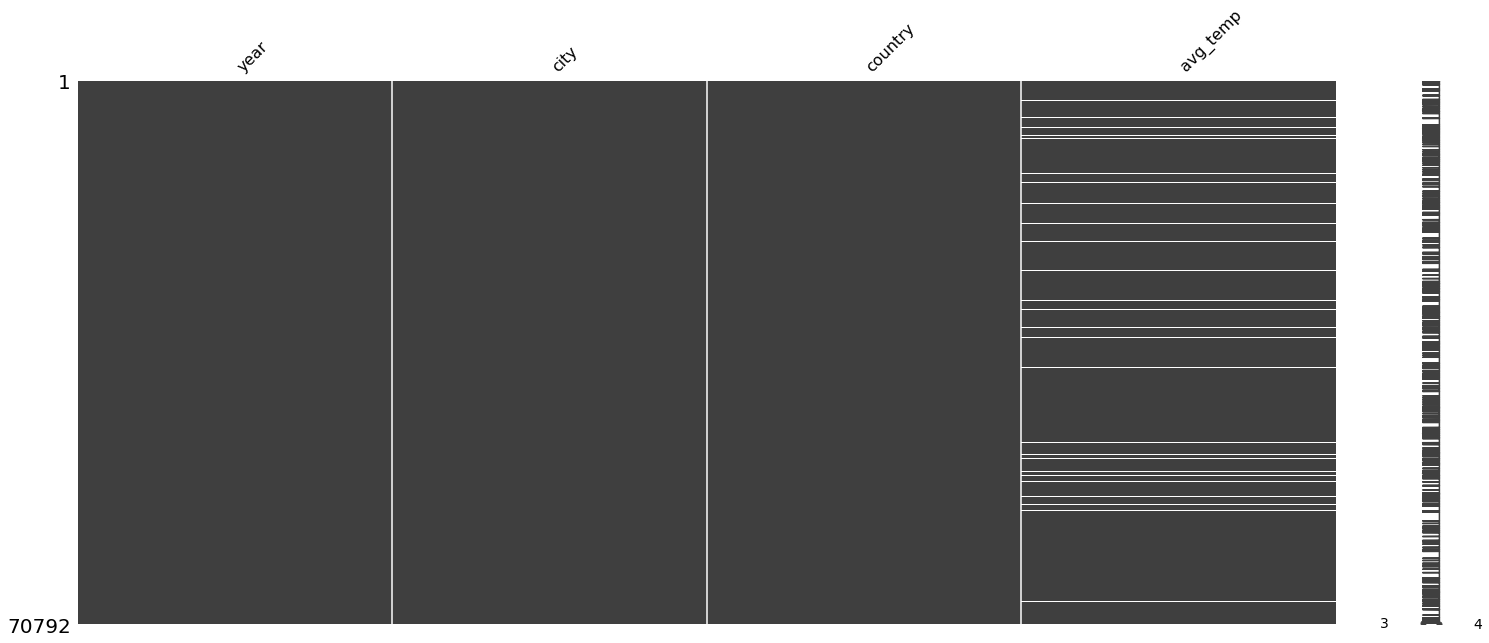

In [0]:
#plot missing values
ms.matrix(df_city_data)

In [0]:
#caluclate missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

In [0]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]["city"].unique())

235

In [0]:
#checking the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [0]:
#checking the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


To check whether there are any missing year values we need to find the max and min year present and subtract it to see if there are 266 years!

In [0]:
#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].min())
print(df_global_data["avg_temp"].min())

1750
5.78


In [0]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].max())
print(df_global_data["avg_temp"].max())

2015
9.83


In [0]:
2015-1750

265

therefore no data is missing


Now we need to choose the country and view there states before we make the analysis!

In [0]:
#select the cities from india out of the city_list dataframe
df_city_list[df_city_list["country"] == "India"]

,city,country
6,Agra,India
7,Ahmadabad,India
12,Allahabad,India
14,Amritsar,India
30,Bangalore,India
44,Bhopal,India
85,Delhi,India
117,Haora,India
125,Hyderabad,India
129,Indore,India


In [0]:
#create a new reference to the city_data dataframe for the city "Bhopal"
df_bhopal = df_city_data[df_city_data["city"] == "Bhopal"]

In [0]:
df_bhopal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 9532 to 9749
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   city      218 non-null    object 
 2   country   218 non-null    object 
 3   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


In [0]:
df_bhopal.head()

,year,city,country,avg_temp
9532,1796,Bhopal,India,25.06
9533,1797,Bhopal,India,26.27
9534,1798,Bhopal,India,24.24
9535,1799,Bhopal,India,25.33
9536,1800,Bhopal,India,25.30


now we need to check whether there is any missing data for Bhopal city

In [0]:
sum(df_bhopal["avg_temp"].isna())

7

In [0]:
df_bhopal[df_bhopal["avg_temp"].isna()]

,year,city,country,avg_temp
9544,1808,Bhopal,India,NaN
9545,1809,Bhopal,India,NaN
9546,1810,Bhopal,India,NaN
9547,1811,Bhopal,India,NaN
9548,1812,Bhopal,India,NaN
9599,1863,Bhopal,India,NaN
9600,1864,Bhopal,India,NaN


In [0]:

# to interpolate the missing values  
df_new=df_bhopal.interpolate(method ='linear', limit_direction ='forward') 


In [0]:
sum(df_new["avg_temp"].isnull())

0

In [0]:
df_new[df_new["avg_temp"].isna()]

,year,city,country,avg_temp


Since we have treated all the missing values now we can proceed further


In [0]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_new["rollingAverage"] = df_new["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Bhopal dataframe
df_new.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
df_global_data["rollingAverage"] = df_global_data["avg_temp"].rolling(window = avg_num).mean()

In [0]:
#display the rolling mean for Bhopal city datframe
df_new[10:20]

,year,city,country,avg_temp,rollingAverage
10,1806,Bhopal,India,25.310000,25.319000
11,1807,Bhopal,India,24.640000,25.156000
12,1808,Bhopal,India,24.643333,25.196333
13,1809,Bhopal,India,24.646667,25.128000
14,1810,Bhopal,India,24.650000,25.063000
15,1811,Bhopal,India,24.653333,25.113333
16,1812,Bhopal,India,24.656667,25.002000
17,1813,Bhopal,India,24.660000,24.915000
18,1814,Bhopal,India,23.840000,24.711000
19,1815,Bhopal,India,24.190000,24.589000


In [0]:
df_global_data[10:20]

,year,avg_temp,rollingAverage
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008
18,1768,6.78,8.012
19,1769,7.69,7.982


Now lets plot the data.



The raw data will be at the back of the rolling data

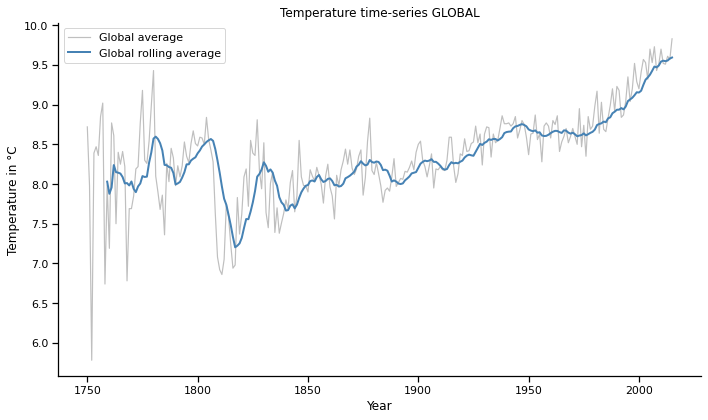

In [0]:
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data, label = "Global average", alpha = 0.5,
                 color = "grey", lw = 1.2)
    sns.lineplot(x = "year", y = "rollingAverage", data = df_global_data, label = "Global rolling average",
                 color = "steelblue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("Temperature in °C")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("Temperature time-series GLOBAL")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

After looking at the line graph we can easily say that it started with a negative spike which means there was a fall in the temperature during 1750-1755. Then as we go to the left we can see that the graph is increasing which means the average global temperature was increasing after 1850. From 1950-1975 the rolling avg temp was stagnant but then again the temperature increased.

Text(0.5, 1.0, "Rolling standard deviation for the global 'avg_temp' data")

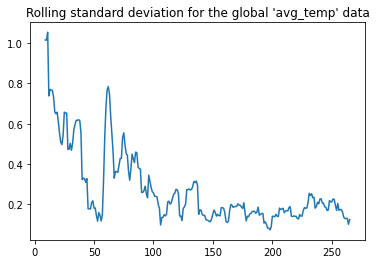

In [0]:
#to check the standard deviation of the rolling average from the average temperature in global data
#calculate the rolling standard deviaton for the global_data dataframe and plot it
df_global_data["avg_temp"].rolling(window = avg_num).std().plot()

#set the title for the plot
plt.title("Rolling standard deviation for the global 'avg_temp' data")

we can see from the above graph that the standard devation is decreasing .....

In [0]:
def prepare_df(cities, avg_num = 10):
    """
    INPUT: cities - list of strings, city names
           avg_num - integer, window for the rolling mean

    OUTPUT: dictionary with preprocessed dataframes and citynames as key
    """    
    #create empty dict
    results = {}    
    
    #loop for all city names
    for x in cities:
        #selecting dataframe for the chosen city and years bigger or equal 1750 and smaller 2014 (for consistency)
        df_x = df_new
        
        #calculate rolling average with window = avg_num
        df_x["rollingAverage"] = df_x["avg_temp"].rolling(window = avg_num).mean()
        
        #calculating the trend
        try:
            #loading the model
            trend_model = LinearRegression()
            
            #define x and y values
            X = df_x[["year"]]
            y = df_x[["avg_temp"]]
            
            #fit the values to the model
            trend_model.fit(X, y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x["trend"] = trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
                       
        except:
            #in case of NaN Values 
            print("Could not calculate trend.")
        
        finally:
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x] = df_x    
    
    for x in results:
        #print the average temperature from 1750 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1750 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'More {x} values: Max: {results[x]["avg_temp"].max():.2f} °C; Min: {results[x]["avg_temp"].min():.2f} °C \n')
    #copy the global data for years < 2014
    df_global = df_global_data[df_global_data["year"] < 2014].copy()
    
    #caluclating the trend line as described above 
    try:
        trend_model = LinearRegression()
        X = df_global["year"]
        trend_model.fit(X = df_global[["year"]], y = df_global[["avg_temp"]])
        trend_plot = trend_model.predict(df_global[["year"]])
        df_global["trend"] = trend_plot
        print(f"Global slope: {trend_model.coef_}")
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global["rollingAverage"] = df_global["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global

        print(f'The global average temperature (1750 - 2013) is: {df_global["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global["avg_temp"].max():.2f} °C; Min: {df_global["avg_temp"].min():.2f} °C')
        #return the dict
        return results

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
    """
    INPUT: result - dictionary with dataframes from the function "prepare_df"
           fig_size - tuple to determine the size of the figure (width, height)
           global_plot - boolean, shows the plot of global data if set to true
           opac - float, sets the opacity for the city - data plots
           show_normal - boolean, plots also the avg_temp in addition to the rolling mean if set to true
           trend - boolean, shows the trend if set to true
    OUTPUT: plot
    """
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "rollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if global_plot = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")

            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "rollingAverage", data = result[x], label = x, alpha = opac)
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling average temperature in °C")
        ax.set_xlabel("Year")
        ax.set_title("Temperature time-series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


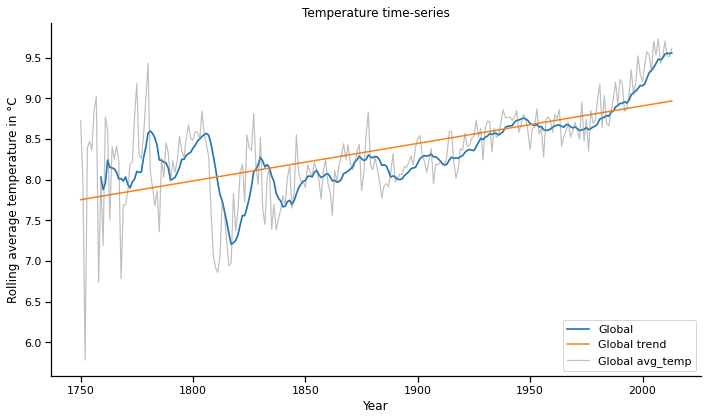

In [61]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prepare_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

Now we will analyse the trend for the Bhopal city

Bhopal slope: [[0.00609563]]
The average temperature in Bhopal (1750 - 2013) is: 25.20 °C
More Bhopal values: Max: 26.68 °C; Min: 20.12 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


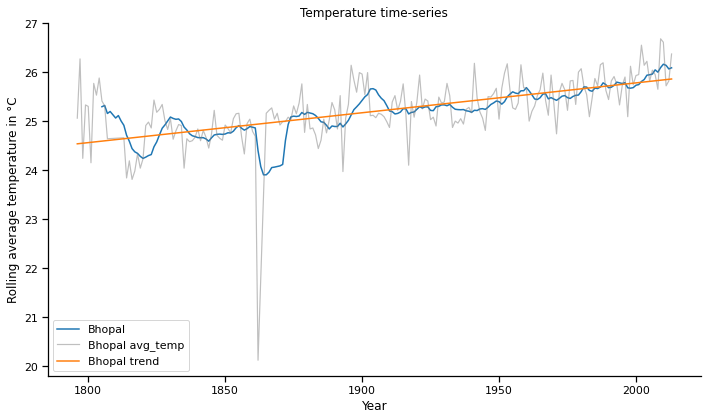

In [63]:
cities = ["Bhopal"]
plot_results(prepare_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)

So, from the above visualisation we can say that-

*   The average value of Bhopal is much higher than the Global average value.
*   The slope differs slightly when we compare for glabal_data and bhopal_data

*   There is a sharp drop in the bhopal avg temperature around 1860





Text(0.5, 1.0, "Rolling standard deviation for the Bhopal 'avg_temp' data")

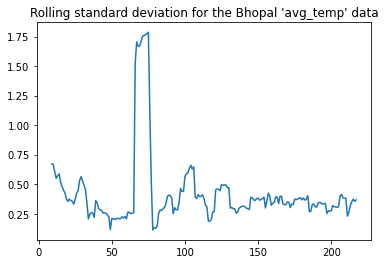

In [64]:
df_new["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling standard deviation for the Bhopal 'avg_temp' data")

From this standard deviation graph we can say that--

*   after around 60 years the std.dev was really high and soon after that in the nxt 10 yrs the deviation decreased evidently.
*   List item



Bhopal slope: [[0.00609563]]
The average temperature in Bhopal (1750 - 2013) is: 25.20 °C
More Bhopal values: Max: 26.68 °C; Min: 20.12 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


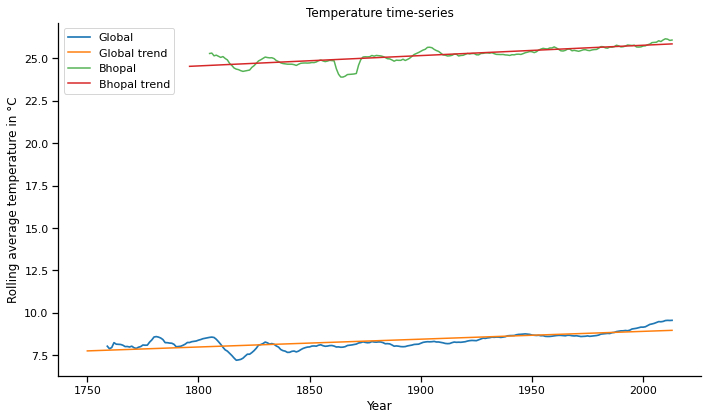

In [65]:
cities = ["Bhopal"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

From this I can say that the gloabal weather and bhopal weather are not much correlated. Both of their Rolling temp are so widely seperated.Also we can see that there was a slight fall in temp after 1800 globally which clearly affected the bhopal temp too.

In [67]:
#to check the correlation of the bhopal graph and the global graph
df_new[["avg_temp"]].corrwith(df_global_data["avg_temp"])

avg_temp    0.411723
dtype: float64

therefore the correlation between two dataframes are: 0.411723

# OBSERVATION


*   Bhopal is a hotter city as compared to the average global temperature. And the difference has been quite consistent 
*   Both the global and Bhopal's average temperature graph is showing an uptrend. Thus the effect of global wrming can be seen here and the world is getting hotter with the passing years.

*  Both the global and Bhopal's slope are positive
*   lastly,the trend is been consistent over the past 100 years .



